# Change in binary inclination due to natal kicks

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import biaswise

plt.style.use('../config/style.mpl')

### Binary conditions at core-collapse

In [2]:
m1 = 5
m1_c_core_mass = 4
m1_remnant_mass = 1.4
m1_fallback_fraction = 0.0
m2 = 15
Porbs = [5, 50, 500]

## Plots

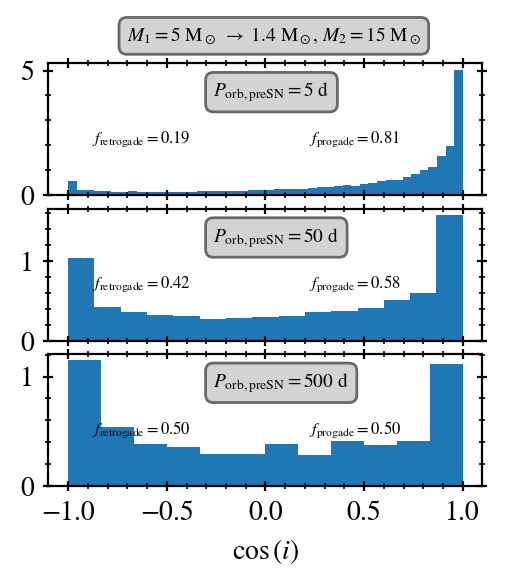

In [3]:
plt.style.use('../config/style.mpl')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(2.8, 2.8), sharex=True,
                       gridspec_kw={'height_ratios': [1.2,1.2,1.2], 'hspace': 0.1})

# Binary conditions at core-collapse
axs[0].annotate('$M_1 = {}$ M$_\\odot$ $\\rightarrow$ {} M$_\\odot$, $M_2 = {}$ M$_\\odot$'.format(m1, m1_remnant_mass, m2),
    xy=(0.25, 0.93), fontsize=7, xycoords='figure fraction',
    bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'))

for k,P in enumerate(Porbs):
    
    # Load binary system into kick module
    binary = biaswise.binary.BinarySystem(m1=m1, m1_core_mass=m1_c_core_mass,
                m1_remnant_mass=m1_remnant_mass,
                m1_fallback_fraction=m1_fallback_fraction, m2=m2, P=P)
    
    # Orbital period preSN
    axs[k].annotate('$P_{} = {}$ d'.format('{\\rm orb, preSN}', P), xy=(0.38, 0.75),
            bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'),
            fontsize=7, xycoords='axes fraction')

    # define type of distribution of natal kicks & compute them
    binary.set_natal_kick_distribution(n_trials=100000, distribution_id='Maxwell',
            kick_scaling=lambda x: (1-binary.m1_fallback_fraction)*x)
    binary.get_natal_kick_distribution()

    # compute orbital parameters & make a grid out of them
    binary.get_orbital_distribution(verbose=False)
    binary.get_post_kick_grid(use_unbounded_for_norm=False, verbose=False)
    
    mask = binary.cosi > 0
    f_prog = len(binary.cosi[mask]) / len(binary.cosi)
    f_ret = len(binary.cosi[~mask]) / len(binary.cosi)

    # plot distribution of kicks
    binary.plot_kick_distribution(xattr='cos_i', fig=fig, ax=axs[k], density=True,
            show=False)
    
    # Text on fractions
    text = '$f_{} = {:.2f}$'.format('{\\rm retrogade}', f_ret)
    axs[k].annotate(text, xy=(0.1, 0.4), fontsize=6, xycoords='axes fraction')
    text = '$f_{} = {:.2f}$'.format('{\\rm progade}', f_prog)
    axs[k].annotate(text, xy=(0.6, 0.4), fontsize=6, xycoords='axes fraction')